In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from collections import defaultdict
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df_total = pd.read_csv('dat_total.csv')
df_total

Unnamed: 0                    artist  \
0               0             Steady Rollin   
1               1            Bell Biv DeVoe   
2               2               CeeLo Green   
3               3                      KARD   
4               4                  James TW   
...           ...                       ...   
15400       15400                       NAV   
15401       15401                   Qulinez   
15402       15402               Nicki Minaj   
15403       15403  Ponderosa Twins Plus One   
15404       15404                 Father MC   

                                                    name  popularity genre  \
0                                           I Feel Alive           0  rock   
1                                                 Poison           0   r&b   
2      Baby It's Cold Outside (feat. Christina Aguilera)           0   r&b   
3                                             Dumb Litty           0   pop   
4                                                Soldier           1   r&b   
...                                                  ...         ...   ...   
15400                                           Some Way           1   r&b   
15401                    Rising Like The Sun - Radio Mix           0   edm   
15402                                           Anaconda           0   pop   
15403                                              Bound           0   r&b   
15404             I'll Do 4 U (Re-Recorded / Remastered)           0   r&b   

                                                  lyrics  
0      the trees are singing in the wind the sky blue...  
1      na yeah spyderman and freeze in full effect uh...  
2      i really cant stay baby its cold outside ive g...  
3      get up out of my business you dont keep me fro...  
4      hold your breath dont look down keep trying da...  
...                                                  ...  
15400  yeah nah nah nah nah nah nah nah nah nah nah n...  
15401  caught up in such a head rush wideeyed lately ...  
15402  my anaconda dont my anaconda dont my anaconda ...  
15403  bound bound bound bound bound to fall in love ...  
15404  would you do for me sweetheart would you do fo...  

[15405 rows x 6 columns]

In [ ]:
def split_data(features, labels):
  xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size = 0.3, random_state = 1)
  return xTrain, xTest, yTrain, yTest

In [ ]:
total_xTrain, total_xTest, total_yTrain, total_yTest = split_data(df_total['lyrics'], df_total['popularity'])

In [ ]:
def build_vocab_map(df):

    # create a default dict for counting unique vocabs in each email
    vocab_counts = defaultdict(int)

    # for every email
    for i in range(df.shape[0]):
        # create a list of vocabs of the email
        vocabs = df.iloc[i].split(" ")
        # make list into a list of unique vocabs
        vocabs = set(vocabs)
        # for each unique vocabs
        for vocab in vocabs:
            # count unique vocabs in each email
            vocab_counts[vocab] += 1

    # create a dictionary for the vocabulary map
    vocab_map = {}

    # for every vocab and its counts
    for word, count in vocab_counts.items():
        # select the words that appear in at least 30 emails
        if count >= 30:
            vocab_map[word] = count

    if '' in vocab_map:
      vocab_map.pop('', None)

    return vocab_map

In [ ]:
total_vocab = build_vocab_map(total_xTrain)
len(total_vocab.keys())

3509

In [ ]:
def construct_binary(train_df, vocab_map):
  
    # create a list of words for the vocab map
    frequent_words = list(vocab_map.keys())

    # initialize the binary dataset
    binary_train = np.zeros((train_df.shape[0], len(frequent_words)))

    # for each email
    for i in range(train_df.shape[0]):
        # create a list of unique vocabs in an email
        vocabs = train_df.iloc[i].split(" ")
        vocabs = set(vocabs)

        # for each words in the vocabulary map
        for j in range(len(frequent_words)):
            # if the words in the vocabulary map is in the email
            if frequent_words[j] in vocabs:
                # set vector as 1
                binary_train[i, j] = 1

    return pd.DataFrame(binary_train, columns = frequent_words)

In [ ]:
def construct_count(train_df, vocab_map):

    # create a list of words for the vocab map
    frequent_words = list(vocab_map.keys())

    # initialize the count dataset
    count_train = np.zeros((train_df.shape[0], len(frequent_words)))

    # for each email
    for i in range(train_df.shape[0]):
        # create a list of vocabs in an email
        vocabs = train_df.iloc[i].split(" ")

        # for each words in the vocabulary map
        for j in range(len(frequent_words)):
            # count the number of times the jth word appears in the email
            count_train[i,j] = vocabs.count(frequent_words[j])
    
    return pd.DataFrame(count_train, columns = frequent_words)

In [ ]:
def construct_all(xTrain, xTest, vocab_list):
  binary_train = construct_binary(xTrain, vocab_list)
  binary_test = construct_binary(xTest, vocab_list)
  count_train = construct_count(xTrain, vocab_list)
  count_test = construct_count(xTest, vocab_list)
  return binary_train, binary_test, count_train, count_test

In [ ]:
total_binary_train, total_binary_test, total_count_train, total_count_test = construct_all(total_xTrain, total_xTest, total_vocab)

In [ ]:
total_binary_train

to    a  reality  its   na  you  yeah  men  must  captain  ...  \
0      1.0  1.0      1.0  1.0  1.0  1.0   1.0  1.0   1.0      1.0  ...   
1      1.0  1.0      0.0  0.0  1.0  1.0   1.0  0.0   0.0      0.0  ...   
2      1.0  1.0      0.0  0.0  1.0  1.0   0.0  0.0   0.0      0.0  ...   
3      1.0  1.0      0.0  1.0  0.0  1.0   0.0  1.0   0.0      0.0  ...   
4      1.0  1.0      0.0  1.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
...    ...  ...      ...  ...  ...  ...   ...  ...   ...      ...  ...   
10778  1.0  1.0      0.0  0.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
10779  1.0  1.0      0.0  0.0  0.0  0.0   0.0  0.0   0.0      0.0  ...   
10780  1.0  1.0      0.0  1.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
10781  1.0  1.0      0.0  1.0  1.0  1.0   1.0  0.0   0.0      0.0  ...   
10782  1.0  1.0      0.0  1.0  1.0  1.0   1.0  0.0   0.0      0.0  ...   

       homeboys  ended  bridges  jaw  rider  purse  dot  bail  shock  devotion  
0           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
1           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
2           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
3           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
...         ...    ...      ...  ...    ...    ...  ...   ...    ...       ...  
10778       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10779       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10780       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10781       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10782       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  

[10783 rows x 3509 columns]

In [ ]:
total_count_train

to     a  reality  its   na   you  yeah  men  must  captain  ...  \
0      17.0   2.0      1.0  2.0  1.0   1.0   3.0  1.0   2.0      1.0  ...   
1      13.0  10.0      0.0  0.0  4.0   2.0   1.0  0.0   0.0      0.0  ...   
2       5.0   1.0      0.0  0.0  1.0  28.0   0.0  0.0   0.0      0.0  ...   
3       7.0  10.0      0.0  1.0  0.0  41.0   0.0  1.0   0.0      0.0  ...   
4      12.0   9.0      0.0  3.0  0.0  12.0   1.0  0.0   0.0      0.0  ...   
...     ...   ...      ...  ...  ...   ...   ...  ...   ...      ...  ...   
10778  16.0   9.0      0.0  0.0  0.0   7.0   3.0  0.0   0.0      0.0  ...   
10779   7.0   5.0      0.0  0.0  0.0   0.0   0.0  0.0   0.0      0.0  ...   
10780   2.0   8.0      0.0  8.0  0.0  10.0   2.0  0.0   0.0      0.0  ...   
10781  18.0   4.0      0.0  2.0  2.0  12.0   4.0  0.0   0.0      0.0  ...   
10782   3.0   4.0      0.0  1.0  1.0   6.0   6.0  0.0   0.0      0.0  ...   

       homeboys  ended  bridges  jaw  rider  purse  dot  bail  shock  devotion  
0           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
1           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
2           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
3           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4           0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
...         ...    ...      ...  ...    ...    ...  ...   ...    ...       ...  
10778       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10779       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10780       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10781       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
10782       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  

[10783 rows x 3509 columns]

In [ ]:
total_binary_test

to    a  reality  its   na  you  yeah  men  must  captain  ...  \
0     1.0  1.0      0.0  0.0  0.0  1.0   0.0  0.0   0.0      0.0  ...   
1     1.0  0.0      0.0  0.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
2     1.0  1.0      0.0  1.0  0.0  1.0   1.0  0.0   1.0      0.0  ...   
3     1.0  0.0      0.0  1.0  0.0  1.0   0.0  0.0   0.0      0.0  ...   
4     1.0  1.0      0.0  0.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
...   ...  ...      ...  ...  ...  ...   ...  ...   ...      ...  ...   
4617  1.0  1.0      0.0  0.0  0.0  1.0   0.0  0.0   0.0      0.0  ...   
4618  1.0  1.0      0.0  0.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
4619  1.0  1.0      0.0  0.0  0.0  1.0   0.0  0.0   0.0      0.0  ...   
4620  1.0  1.0      0.0  0.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   
4621  1.0  1.0      0.0  1.0  0.0  1.0   1.0  0.0   0.0      0.0  ...   

      homeboys  ended  bridges  jaw  rider  purse  dot  bail  shock  devotion  
0          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
1          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
2          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
3          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
...        ...    ...      ...  ...    ...    ...  ...   ...    ...       ...  
4617       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4618       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4619       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4620       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4621       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  

[4622 rows x 3509 columns]

In [ ]:
total_count_test

to     a  reality  its   na    you  yeah  men  must  captain  ...  \
0      3.0   7.0      0.0  0.0  0.0   10.0   0.0  0.0   0.0      0.0  ...   
1      8.0   0.0      0.0  0.0  0.0   10.0   6.0  0.0   0.0      0.0  ...   
2     24.0  22.0      0.0  6.0  0.0  136.0   8.0  0.0   2.0      0.0  ...   
3      9.0   0.0      0.0  6.0  0.0    9.0   0.0  0.0   0.0      0.0  ...   
4      1.0   6.0      0.0  0.0  0.0   29.0  10.0  0.0   0.0      0.0  ...   
...    ...   ...      ...  ...  ...    ...   ...  ...   ...      ...  ...   
4617   3.0   4.0      0.0  0.0  0.0   46.0   0.0  0.0   0.0      0.0  ...   
4618   6.0  20.0      0.0  0.0  0.0    8.0   8.0  0.0   0.0      0.0  ...   
4619   4.0   7.0      0.0  0.0  0.0    8.0   0.0  0.0   0.0      0.0  ...   
4620   8.0  14.0      0.0  0.0  0.0    1.0   4.0  0.0   0.0      0.0  ...   
4621  10.0   7.0      0.0  7.0  0.0    3.0   1.0  0.0   0.0      0.0  ...   

      homeboys  ended  bridges  jaw  rider  purse  dot  bail  shock  devotion  
0          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
1          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
2          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
3          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4          0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
...        ...    ...      ...  ...    ...    ...  ...   ...    ...       ...  
4617       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4618       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4619       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4620       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  
4621       0.0    0.0      0.0  0.0    0.0    0.0  0.0   0.0    0.0       0.0  

[4622 rows x 3509 columns]

In [ ]:
def pos_neg_words(model, word_dict):
  word_list = list(word_dict.keys())
  pos_indices = np.argsort(model.coef_[0])[::-1]
  words_pos = []
  for i in range(15):
      index = pos_indices[i]
      words_pos.append(word_list[index])
  
  neg_indices = np.argsort(model.coef_[0])
  words_neg = []
  for i in range(15):
      index = neg_indices[i]
      words_neg.append(word_list[index])

  return words_pos, words_neg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

def perceptron_optimal(xTrain, yTrain, word_list):

  max_iters = [1, 10, 20, 40, 80, 120, 150]
  learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

  plt.figure(figsize=(12, 8))  # Create a figure

  # Plot number of mistakes based on max_iter for different learning rates
  for lr in learning_rates:
    mistakes = []

    for max_iter in max_iters:
      model = Perceptron(random_state=1, max_iter=max_iter, eta0=lr)
      model.fit(xTrain, yTrain)

      predictions = model.predict(xTrain)

      num_mistakes = sum(predictions != yTrain)

      mistakes.append(num_mistakes)

    # Plot the line for current learning rate
    label = 'Learning Rate = {}'.format(lr)
    plt.plot(max_iters, mistakes, '-', label=label)

  plt.xlabel('Max Iterations')
  plt.ylabel('Number of Mistakes')
  plt.legend()
  plt.title('Number of Mistakes vs. Max Iterations for Different Learning Rates')
  plt.show()


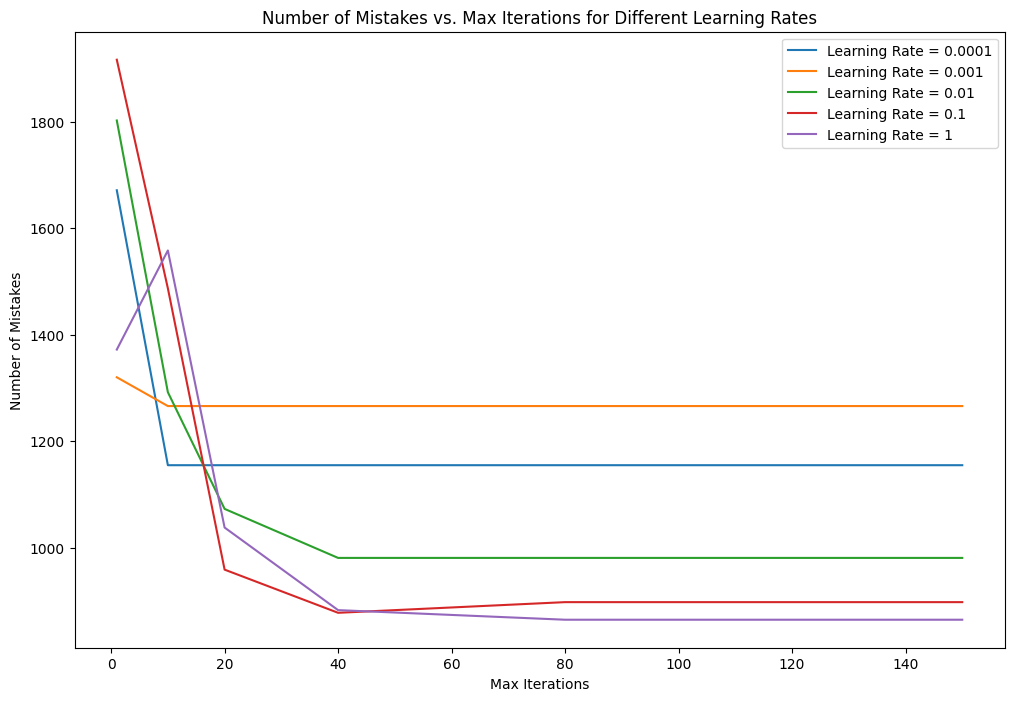

In [ ]:
perceptron_optimal(total_binary_train, total_yTrain, total_vocab)

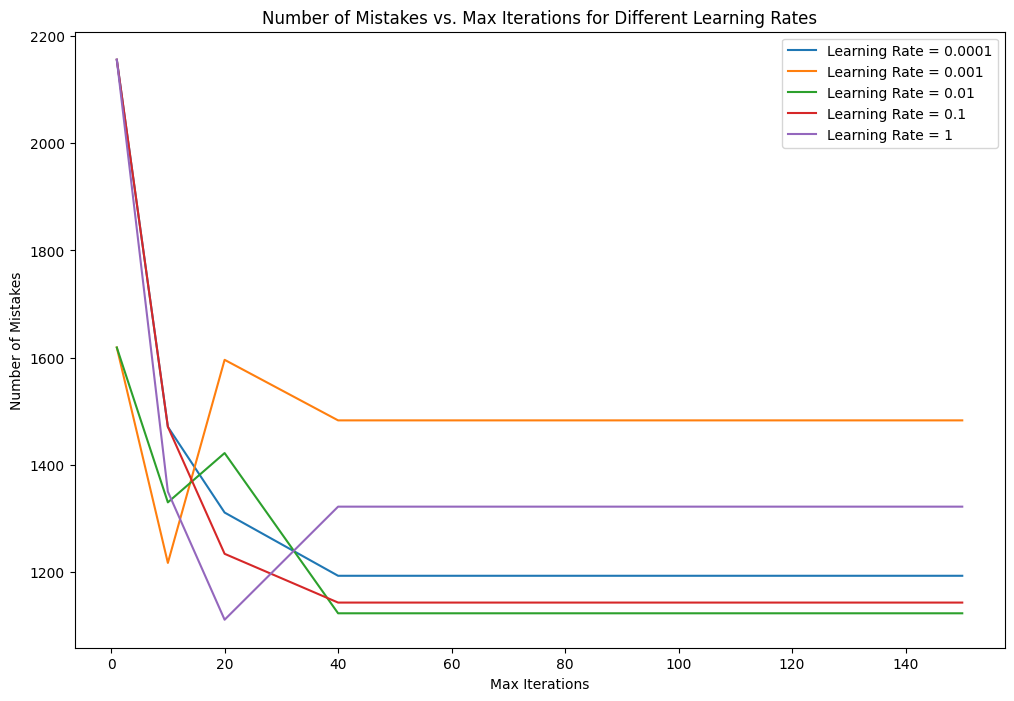

In [ ]:
perceptron_optimal(total_count_train, total_yTrain, total_vocab)

In [ ]:
total_max_iters = [80, 40]
total_learning_rates = [1, 0.01]

In [ ]:
def perceptron_accuracy(binary_train, binary_test, count_train, count_test, yTrain, yTest, word_list, max_iters, learning_rates):
  model_binary = Perceptron(random_state = 1, max_iter = max_iters[0], eta0 = learning_rates[0])
  model_binary.fit(binary_train, yTrain)
  model_count = Perceptron(random_state = 1, max_iter = max_iters[1], eta0 = learning_rates[1])
  model_count.fit(count_train, yTrain)
  predictions_binary_train = model_binary.predict(binary_train)
  predictions_binary_test = model_binary.predict(binary_test)
  predictions_count_train = model_count.predict(count_train)
  predictions_count_test = model_count.predict(count_test)
  num_mistakes_binary_train = sum(predictions_binary_train != yTrain)
  num_mistakes_binary_test = sum(predictions_binary_test != yTest)
  num_mistakes_count_train = sum(predictions_count_train != yTrain)
  num_mistakes_count_test = sum(predictions_count_test != yTest)
  print("Number of mistakes on binary train data: ", num_mistakes_binary_train)
  print("Number of mistakes on binary test data: ", num_mistakes_binary_test)
  print("Number of mistakes on count train data: ", num_mistakes_count_train)
  print("Number of mistakes on count test data: ", num_mistakes_count_test)
  binary_train_score = accuracy_score(predictions_binary_train, yTrain)
  print("Accuracy score on binary train data: ", binary_train_score)
  binary_test_score = accuracy_score(predictions_binary_test, yTest)
  print("Accuracy score on binary test data: ", binary_test_score)
  count_train_score = accuracy_score(predictions_count_train, yTrain)
  print("Accuracy score on count train data: ", count_train_score)
  count_test_score = accuracy_score(predictions_count_test, yTest)
  print("Accuracy score on count test data: ", count_test_score)
  
  binary_pos, binary_neg = pos_neg_words(model_binary, word_list)
  count_pos, count_neg = pos_neg_words(model_count, word_list)

  print("15 most positive words for binary model: ")
  print(binary_pos)
  print("15 most negative words for binary model: ")
  print(binary_neg)
  print("15 most positive words for count model: ")
  print(count_pos)
  print("15 most negative words for count model: ")
  print(count_neg)

In [ ]:
print("Accuracy score on total dataset")
perceptron_accuracy(total_binary_train, total_binary_test, total_count_train, total_count_test, total_yTrain, total_yTest, total_vocab, total_max_iters, total_learning_rates)

Accuracy score on total dataset
Number of mistakes on binary train data:  865
Number of mistakes on binary test data:  857
Number of mistakes on count train data:  1123
Number of mistakes on count test data:  692
Accuracy score on binary train data:  0.9197811369748679
Accuracy score on binary test data:  0.814582431847685
Accuracy score on count train data:  0.8958545859222851
Accuracy score on count test data:  0.8502812635222847
15 most positive words for binary model: 
['j', 'ticking', 'balling', 'softly', 'smith', 'apartment', 'eastside', 'visit', 'cups', 'drew', 'crunk', 'weird', 'section', 'complain', 'meal']
15 most negative words for binary model: 
['cuz', 'aye', 'lower', 'everytime', 'risk', 'don', 'dub', 'reckless', 'patiently', 'shootin', 'headed', 'porsche', 'created', 'habit', 'anger']
15 most positive words for count model: 
['dawg', 'plans', 'rains', 'walkin', 'songs', 'hopin', 'electric', 'mornin', 'citys', 'tie', 'shape', 'mmmm', 'teeth', 'learning', 'impossible']
15 

In [ ]:
df_edm = pd.read_csv('dat_edm.csv') 
df_latin = pd.read_csv('dat_latin.csv')
df_pop = pd.read_csv('dat_pop.csv')
df_rap = pd.read_csv('dat_rap.csv')
df_rb = pd.read_csv('dat_rb.csv')
df_rock = pd.read_csv('dat_rock.csv')

In [ ]:
edm_xTrain, edm_xTest, edm_yTrain, edm_yTest = split_data(df_edm['lyrics'], df_edm['popularity'])
latin_xTrain, latin_xTest, latin_yTrain, latin_yTest = split_data(df_latin['lyrics'], df_latin['popularity'])
pop_xTrain, pop_xTest, pop_yTrain, pop_yTest = split_data(df_pop['lyrics'], df_pop['popularity'])
rap_xTrain, rap_xTest, rap_yTrain, rap_yTest = split_data(df_rap['lyrics'], df_rap['popularity'])
rb_xTrain, rb_xTest, rb_yTrain, rb_yTest = split_data(df_rb['lyrics'], df_rb['popularity'])
rock_xTrain, rock_xTest, rock_yTrain, rock_yTest = split_data(df_rock['lyrics'], df_rock['popularity'])


In [ ]:
edm_vocab = build_vocab_map(edm_xTrain)
latin_vocab = build_vocab_map(latin_xTrain)
pop_vocab = build_vocab_map(pop_xTrain)
rap_vocab = build_vocab_map(rap_xTrain)
rb_vocab = build_vocab_map(rb_xTrain)
rock_vocab = build_vocab_map(rock_xTrain)

In [ ]:
edm_binary_train, edm_binary_test, edm_count_train, edm_count_test = construct_all(edm_xTrain, edm_xTest, edm_vocab)
latin_binary_train, latin_binary_test, latin_count_train, latin_count_test = construct_all(latin_xTrain, latin_xTest, latin_vocab)
pop_binary_train, pop_binary_test, pop_count_train, pop_count_test = construct_all(pop_xTrain, pop_xTest, pop_vocab)
rap_binary_train, rap_binary_test, rap_count_train, rap_count_test = construct_all(rap_xTrain, rap_xTest, rap_vocab)
rb_binary_train, rb_binary_test, rb_count_train, rb_count_test = construct_all(rb_xTrain, rb_xTest, rb_vocab)
rock_binary_train, rock_binary_test, rock_count_train, rock_count_test = construct_all(rock_xTrain, rock_xTest, rock_vocab)

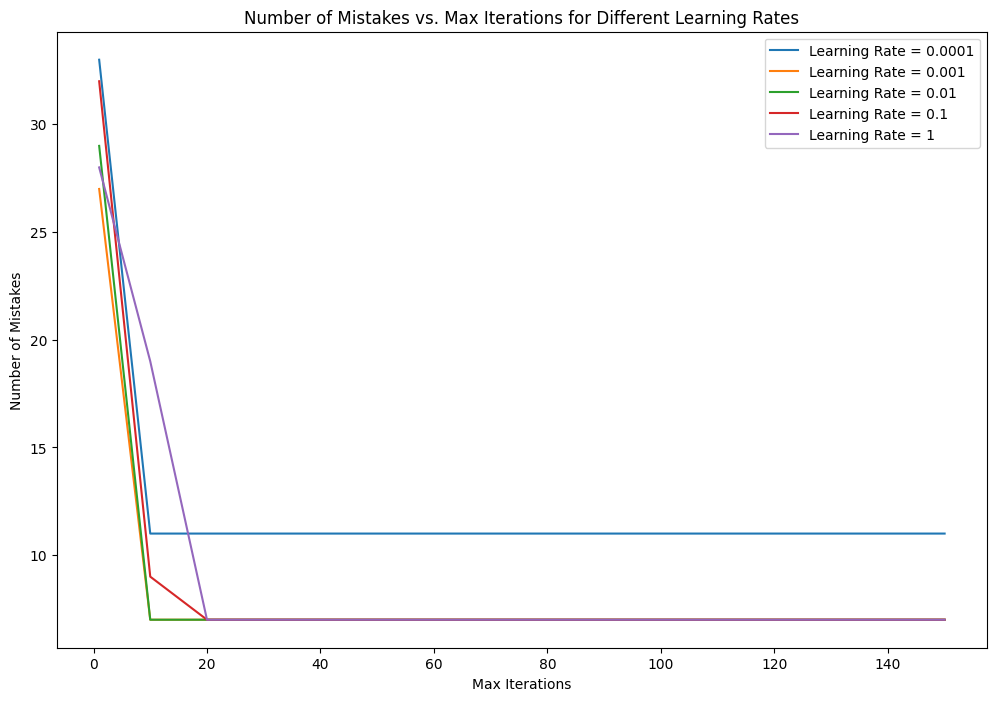

In [ ]:
perceptron_optimal(edm_binary_train, edm_yTrain, edm_vocab)

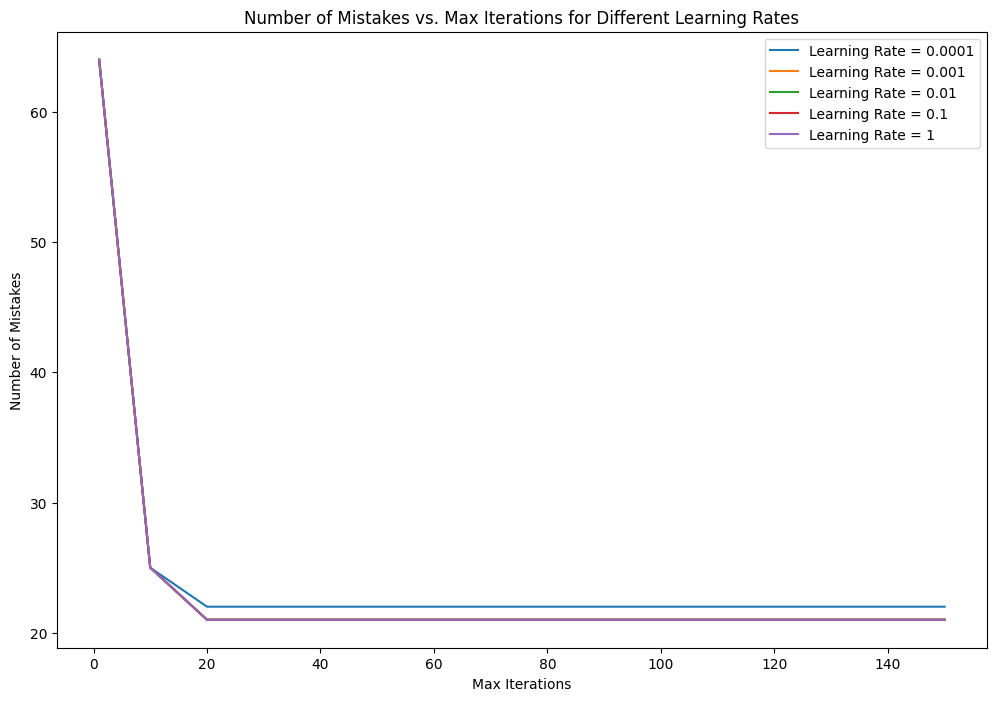

In [ ]:
perceptron_optimal(edm_count_train, edm_yTrain, edm_vocab)

In [ ]:
edm_max_iters = [20, 20]
edm_learning_rates = [1, 1]

In [ ]:
print("Accuracy score on edm dataset")
perceptron_accuracy(edm_binary_train, edm_binary_test, edm_count_train, edm_count_test, edm_yTrain, edm_yTest, edm_vocab, edm_max_iters, edm_learning_rates)

Accuracy score on edm dataset
Number of mistakes on binary train data:  7
Number of mistakes on binary test data:  28
Number of mistakes on count train data:  21
Number of mistakes on count test data:  23
Accuracy score on binary train data:  0.9943089430894309
Accuracy score on binary test data:  0.946969696969697
Accuracy score on count train data:  0.9829268292682927
Accuracy score on count test data:  0.9564393939393939
15 most positive words for binary model: 
['uh', 'head', 'lets', 'feelin', 'times', 'girls', 'ever', 'many', 'oh', 'afraid', 'days', 'care', 'need', 'forget', 'long']
15 most negative words for binary model: 
['ive', 'its', 'put', 'me', 'if', 'hold', 'around', 'think', 'tryna', 'right', 'away', 'air', 'who', 'call', 'talk']
15 most positive words for count model: 
['hate', 'lets', 'than', 'follow', 'id', 'wait', 'sorry', 'until', 'please', 'cool', 'ya', 'made', 'thats', 'youll', 'too']
15 most negative words for count model: 
['ride', 'could', 'day', 'work', 'feel',

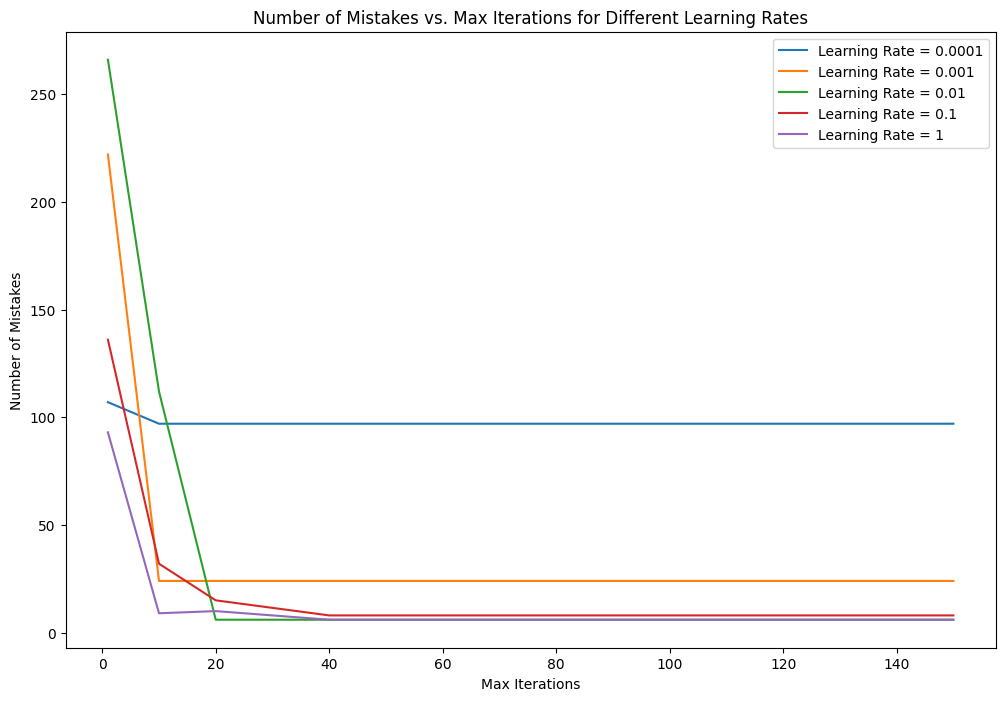

In [ ]:
perceptron_optimal(latin_binary_train, latin_yTrain, latin_vocab)

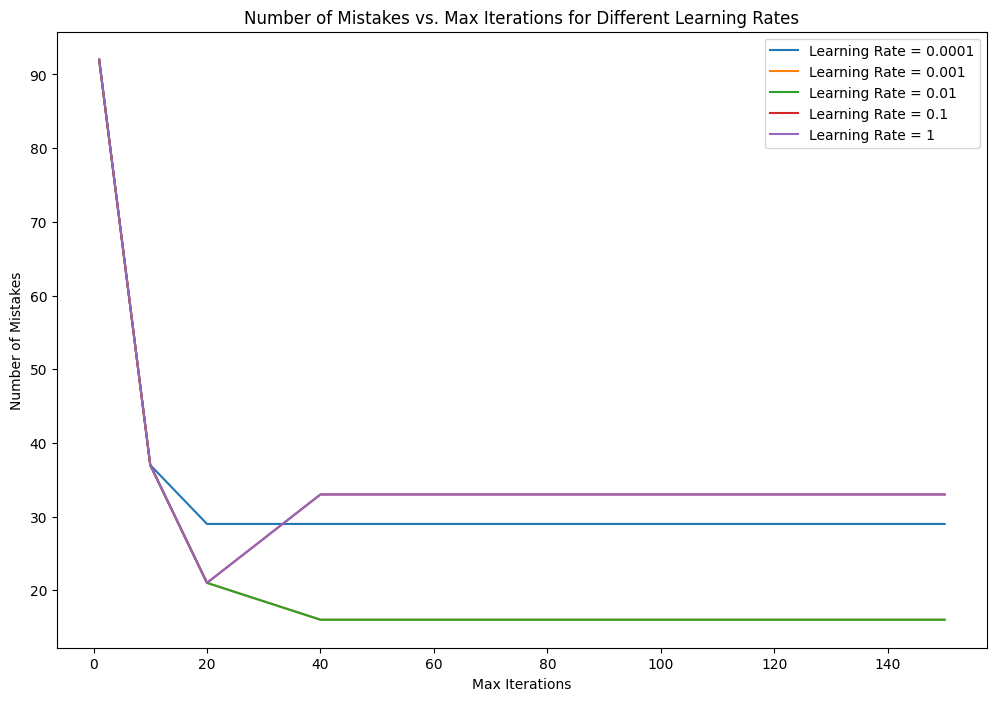

In [ ]:
perceptron_optimal(latin_count_train, latin_yTrain, latin_vocab)

In [ ]:
latin_max_iters = [40, 40]
latin_learning_rates = [1, 0.01]

In [ ]:
print("Accuracy score on latin dataset")
perceptron_accuracy(latin_binary_train, latin_binary_test, latin_count_train, latin_count_test, latin_yTrain, latin_yTest, latin_vocab, latin_max_iters, latin_learning_rates)

Accuracy score on latin dataset
Number of mistakes on binary train data:  6
Number of mistakes on binary test data:  59
Number of mistakes on count train data:  16
Number of mistakes on count test data:  63
Accuracy score on binary train data:  0.989983305509182
Accuracy score on binary test data:  0.7713178294573644
Accuracy score on count train data:  0.9732888146911519
Accuracy score on count test data:  0.7558139534883721
15 most positive words for binary model: 
['name', 'boy', 'life', 'say', 'friends', 'real', 'aint', 'cause', 'came', 'yeah', 'will', 'made', 'just', 'where', 'were']
15 most negative words for binary model: 
['thinking', 'care', 'hit', 'told', 'stay', 'youve', 'see', 'believe', 'go', 'the', 'seen', 'us', 'die', 'away', 'only']
15 most positive words for count model: 
['keep', 'want', 'would', 'break', 'name', 'friends', 'shes', 'days', 'found', 'aint', 'arms', 'wanna', 'around', 'crazy', 'been']
15 most negative words for count model: 
['hit', 'from', 'us', 'as', 

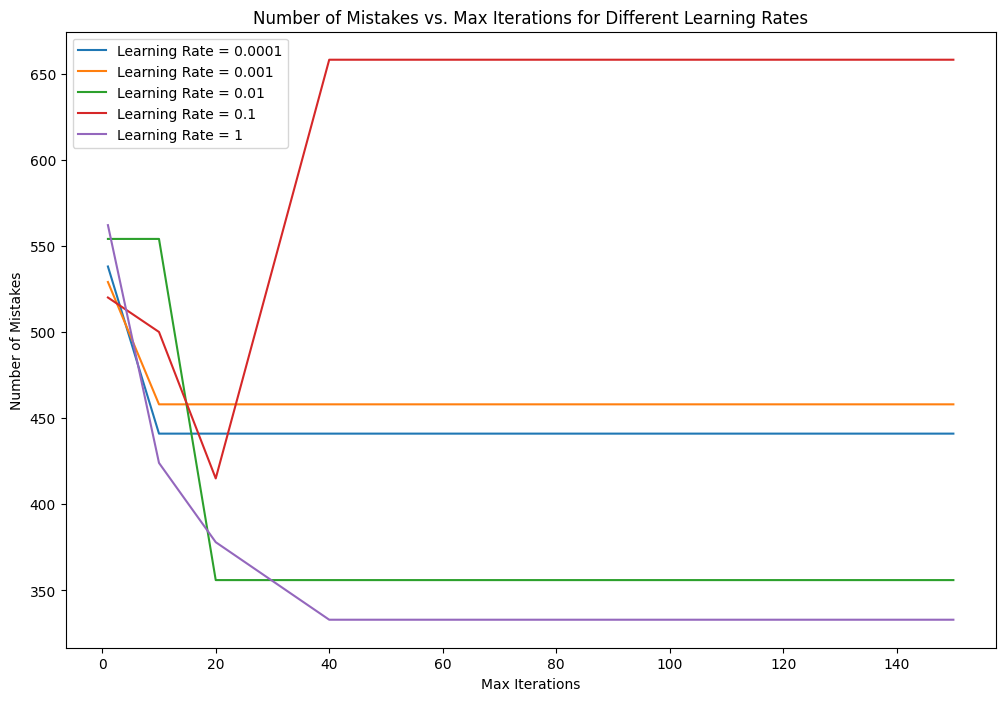

In [ ]:
perceptron_optimal(pop_binary_train, pop_yTrain, pop_vocab)

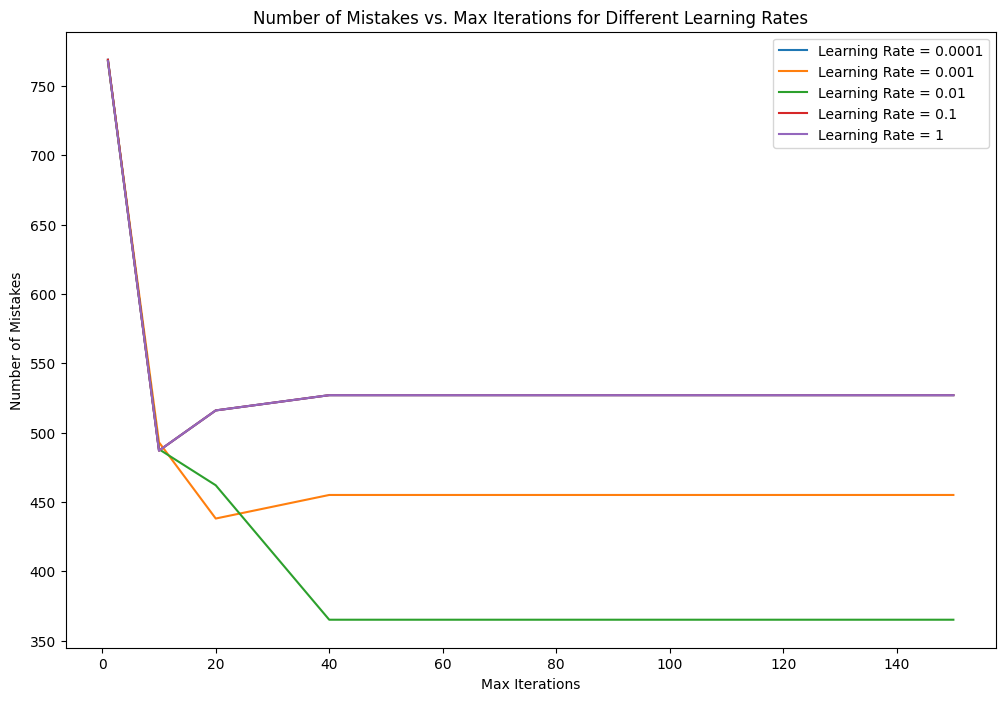

In [ ]:
perceptron_optimal(pop_count_train, pop_yTrain, pop_vocab)

In [ ]:
pop_max_iters = [40, 40]
pop_learning_rates = [1, 0.01]

In [ ]:
print("Accuracy score on pop dataset")
perceptron_accuracy(pop_binary_train, pop_binary_test, pop_count_train, pop_count_test, pop_yTrain, pop_yTest, pop_vocab, pop_max_iters, pop_learning_rates)

Accuracy score on pop dataset
Number of mistakes on binary train data:  333
Number of mistakes on binary test data:  368
Number of mistakes on count train data:  365
Number of mistakes on count test data:  309
Accuracy score on binary train data:  0.8727550630492931
Accuracy score on binary test data:  0.6720142602495544
Accuracy score on count train data:  0.8605273213603363
Accuracy score on count test data:  0.7245989304812834
15 most positive words for binary model: 
['runnin', 'falls', 'woman', 'guys', 'bitches', 'ends', 'outta', 'pass', 'ayy', 'starting', 'lover', 'lord', 'walked', 'count', 'fade']
15 most negative words for binary model: 
['searching', 'belong', 'letting', 'tongue', 'needs', 'doing', 'heat', 'strange', 'eat', 'worry', 'wasting', 'fill', 'hair', 'explain', 'fit']
15 most positive words for count model: 
['lucky', 'runnin', 'woman', 'outta', 'point', 'yourself', 'child', 'lover', 'locked', 'single', 'fast', 'afraid', 'dust', 'voice', 'type']
15 most negative words

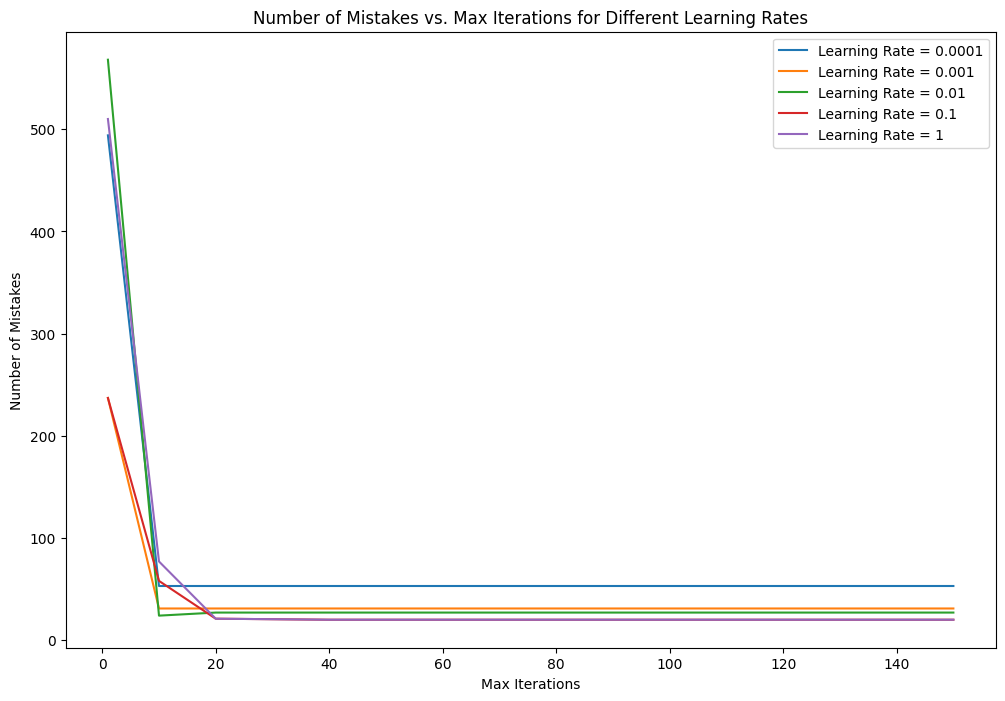

In [ ]:
perceptron_optimal(rap_binary_train, rap_yTrain, rap_vocab)

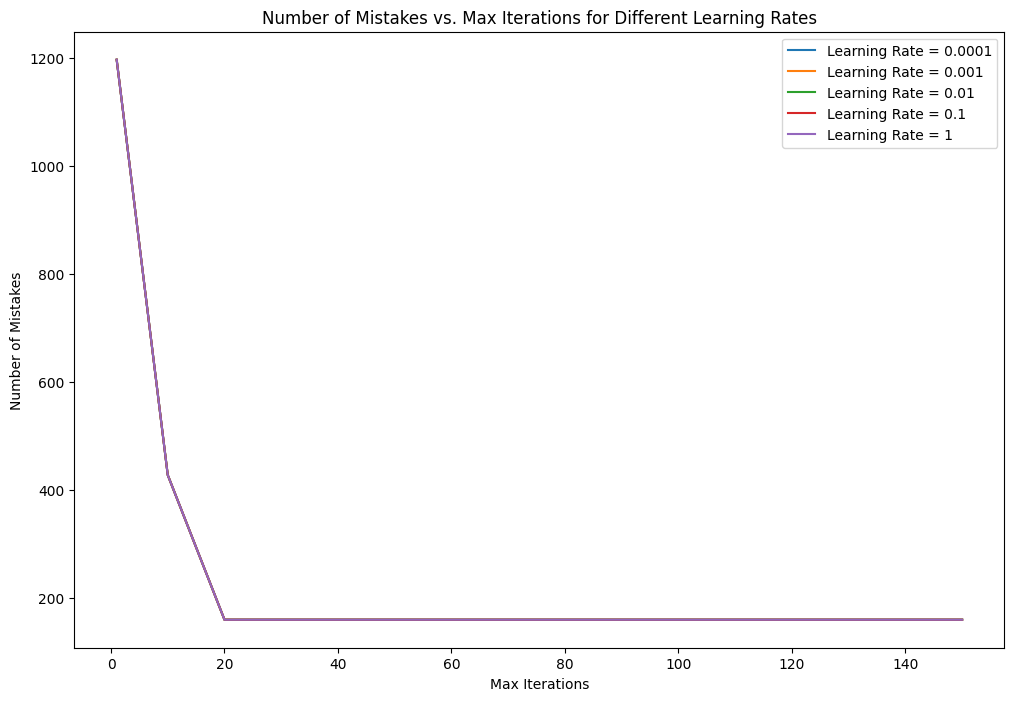

In [ ]:
perceptron_optimal(rap_count_train, rap_yTrain, rap_vocab)

In [ ]:
rap_max_iters = [40, 20]
rap_learning_rates = [1, 1]

In [ ]:
print("Accuracy score on rap dataset")
perceptron_accuracy(rap_binary_train, rap_binary_test, rap_count_train, rap_count_test, rap_yTrain, rap_yTest, rap_vocab, rap_max_iters, rap_learning_rates)

Accuracy score on rap dataset
Number of mistakes on binary train data:  20
Number of mistakes on binary test data:  130
Number of mistakes on count train data:  160
Number of mistakes on count test data:  99
Accuracy score on binary train data:  0.9885779554540263
Accuracy score on binary test data:  0.8268974700399467
Accuracy score on count train data:  0.9086236436322102
Accuracy score on count test data:  0.8681757656458056
15 most positive words for binary model: 
['switch', 'bleed', 'huh', 'ayy', 'go', 'jealous', 'fame', 'dollar', 'section', 'outta', 'sippin', 'pocket', 'dont', 'chose', 'benz']
15 most negative words for binary model: 
['hood', 'weve', 'neck', 'wit', 'now', 'else', 'freak', 'shootin', 'imma', 'started', 'didnt', 'ball', 'tonight', 'runnin', 'living']
15 most positive words for count model: 
['waitin', 'diamonds', 'scared', 'ring', 'meant', 'dogg', 'weekend', 'dat', 'lord', 'fly', 'while', 'news', 'times', 'nah', 'sippin']
15 most negative words for count model: 


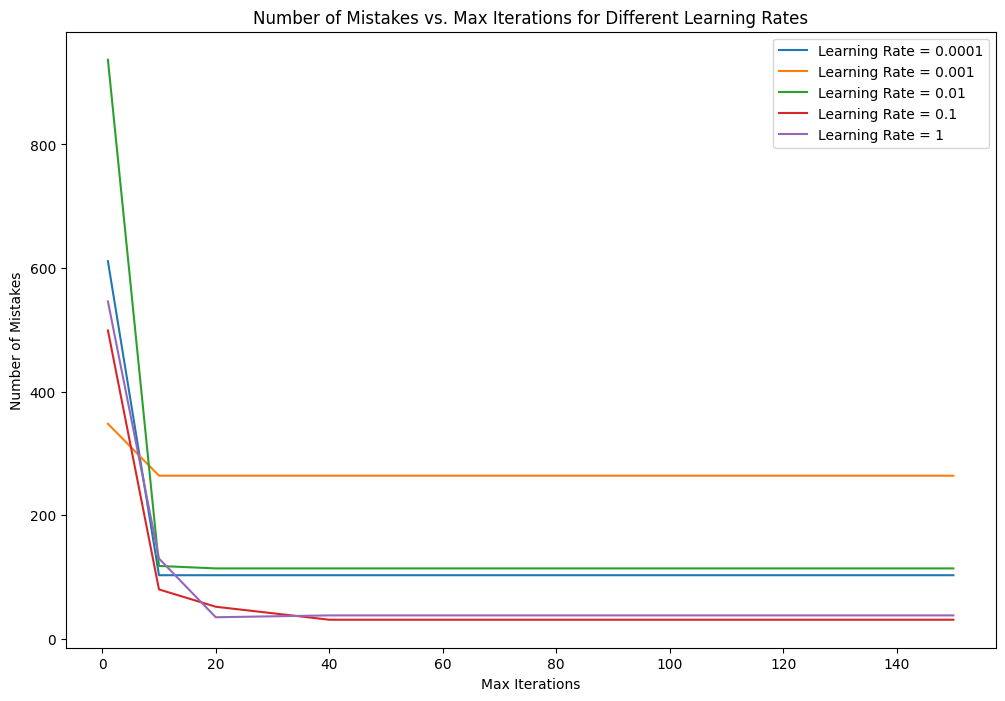

In [ ]:
perceptron_optimal(rb_binary_train, rb_yTrain, rb_vocab)

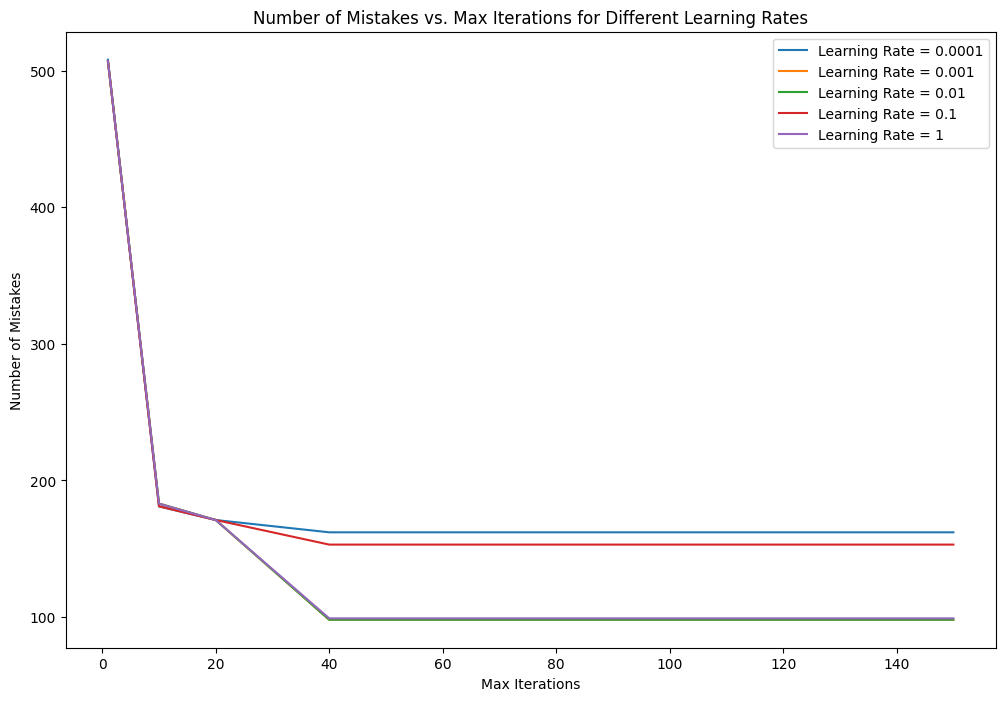

In [ ]:
perceptron_optimal(rb_count_train, rb_yTrain, rb_vocab)

In [ ]:
rb_max_iters = [20, 40]
rb_learning_rates = [0.01, 0.01]

In [ ]:
print("Accuracy score on rb dataset")
perceptron_accuracy(rb_binary_train, rb_binary_test, rb_count_train, rb_count_test, rb_yTrain, rb_yTest, rb_vocab, rb_max_iters, rb_learning_rates)

Accuracy score on rb dataset
Number of mistakes on binary train data:  114
Number of mistakes on binary test data:  196
Number of mistakes on count train data:  98
Number of mistakes on count test data:  142
Accuracy score on binary train data:  0.9484629294755877
Accuracy score on binary test data:  0.7934668071654373
Accuracy score on count train data:  0.9556962025316456
Accuracy score on count test data:  0.8503688092729189
15 most positive words for binary model: 
['skin', 'freak', 'hurts', 'ass', 'build', 'mad', 'dry', 'nasty', 'shame', 'single', 'me', 'walls', 'drink', 'lonely', 'needs']
15 most negative words for binary model: 
['damn', 'wouldnt', 'cuz', 'everyday', 'pick', 'brown', 'already', 'bar', 'being', 'kind', 'tomorrow', 'seems', 'save', 'lady', 'legs']
15 most positive words for count model: 
['break', 'caught', 'songs', 'skin', 'stars', 'scared', 'cross', 'seen', 'waitin', 'else', 'build', 'moves', 'done', 'hair', 'perfect']
15 most negative words for count model: 
['

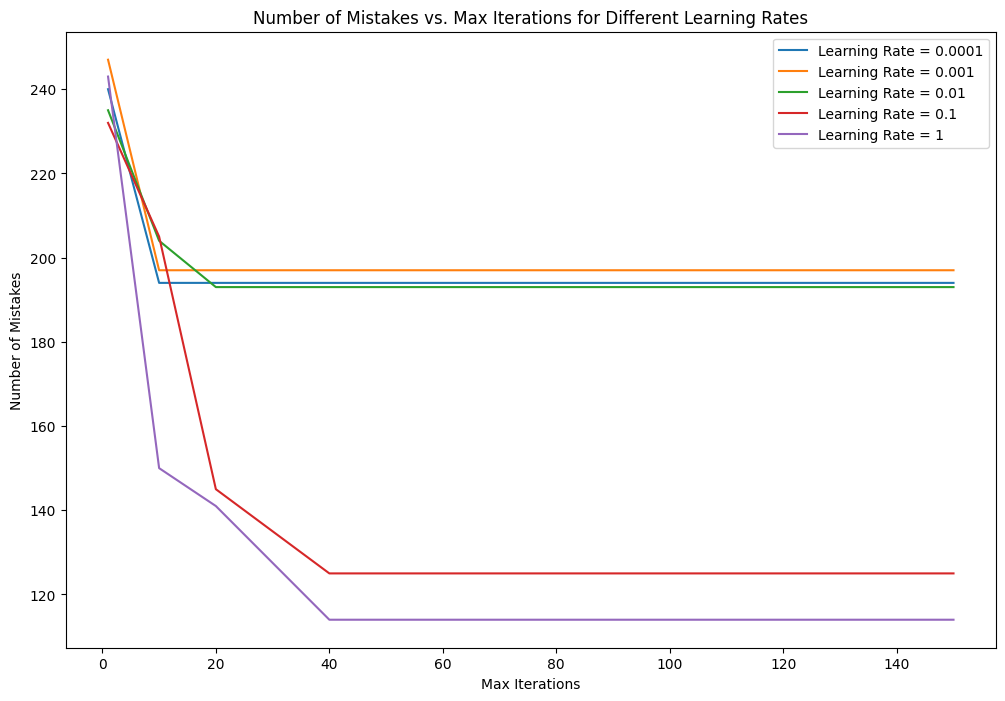

In [ ]:
perceptron_optimal(rock_binary_train, rock_yTrain, rock_vocab)

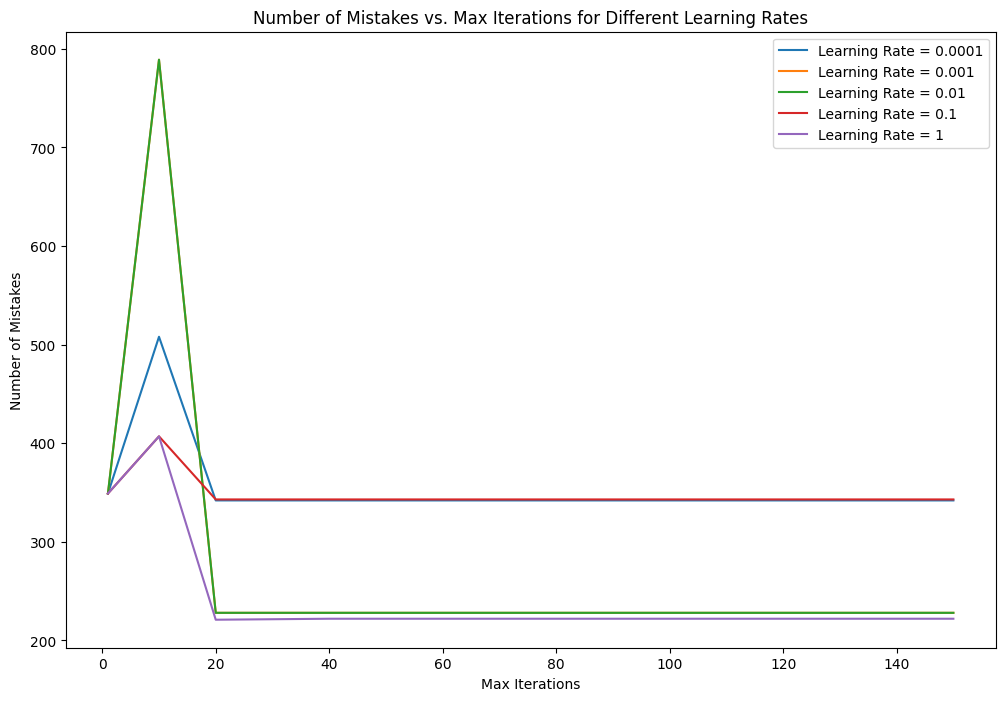

In [ ]:
perceptron_optimal(rock_count_train, rock_yTrain, rock_vocab)

In [ ]:
rock_max_iters = [40, 20]
rock_learning_rates = [1, 1]

In [ ]:
print("Accuracy score on rock dataset")
perceptron_accuracy(rock_binary_train, rock_binary_test, rock_count_train, rock_count_test, rock_yTrain, rock_yTest, rock_vocab, rock_max_iters, rock_learning_rates)

Accuracy score on rock dataset
Number of mistakes on binary train data:  114
Number of mistakes on binary test data:  240
Number of mistakes on count train data:  221
Number of mistakes on count test data:  137
Accuracy score on binary train data:  0.9519190215099115
Accuracy score on binary test data:  0.7640117994100295
Accuracy score on count train data:  0.906790383804302
Accuracy score on count test data:  0.8652900688298918
15 most positive words for binary model: 
['corner', 'death', 'lead', 'forget', 'mmm', 'hurts', 'sand', 'children', 'places', 'turned', 'having', 'somewhere', 'bet', 'older', 'awake']
15 most negative words for binary model: 
['thinking', 'surely', 'school', 'door', 'huh', 'lord', 'swear', 'follow', 'beyond', 'enough', 'lifes', 'golden', 'listen', 'kinda', 'fly']
15 most positive words for count model: 
['whole', 'dry', 'though', 'highway', 'stop', 'runnin', 'kiss', 'dust', 'part', 'throw', 'sound', 'did', 'silence', 'speak', 'maybe']
15 most negative words fo

In [ ]:
def multinomial(x_train, x_test, y_train, y_test):
    params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 2, ]
         }

    multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
    multinomial_nb_grid.fit(x_train, y_train)

    print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
    print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

    # Test the classifier on the test set and print the accuracy
    y_testpred = multinomial_nb_grid.predict(x_test)
    num_testmistakes = sum(y_testpred != y_test)
    y_trainpred = multinomial_nb_grid.predict(x_train)
    num_trainmistakes = sum(y_trainpred != y_train)
    train_accuracy = accuracy_score(y_train, y_trainpred)
    test_accuracy = accuracy_score(y_test, y_testpred)
    print('NB Train Accuracy:', train_accuracy)
    print('NB Number of trainmistakes:', num_trainmistakes)
    print('NB Test Accuracy:', test_accuracy)
    print('NB Number of testmistakes:', num_testmistakes)
    print()


In [ ]:
print('Multinomial EDM Binary')
multinomial(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Multinomial EDM Count')
multinomial(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Multinomial Latin Binary')
multinomial(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Multinomial Latin Count')
multinomial(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Multinomial Pop Binary')
multinomial(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Multinomial Pop Count')
multinomial(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Multinomial Rap Binary')
multinomial(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Multinomial Rap Count')
multinomial(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Multinomial RB Binary')
multinomial(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Multinomial RB Count')
multinomial(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Multinomial Rock Binary')
multinomial(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Multinomial Rock Count')
multinomial(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Multinomial Total Binary')
multinomial(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Multinomial Total Count')
multinomial(total_count_train, total_count_test, total_yTrain, total_yTest)

Multinomial EDM Binary
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.978
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True}

NB Train Accuracy: 0.9780487804878049
NB Number of trainmistakes: 27
NB Test Accuracy: 0.9678030303030303
NB Number of testmistakes: 17

Multinomial EDM Count
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.948
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}

NB Train Accuracy: 0.9439024390243902
NB Number of trainmistakes: 69
NB Test Accuracy: 0.9242424242424242
NB Number of testmistakes: 40

Multinomial Latin Binary
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.876
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True}

NB Train Accuracy: 0.8764607679465777
NB Number of trainmistakes: 74
NB Test Accuracy: 0.8604651162790697
NB Number of 

In [ ]:
from sklearn import preprocessing


In [ ]:
def Logistic(x_train, x_test, y_train, y_test):
  # Logistic Regression
  params = {'C': np.logspace(-3,3,7),
          'penalty': ['l1', 'l2', None, 'elasticnet']}
  logreg_grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
  logreg_grid.fit(x_train, y_train)
  print('Best Accuracy Through Grid Search : {:.3f}'.format(logreg_grid.best_score_))
  print('Best Parameters : {}\n'.format(logreg_grid.best_params_))

  # Test the classifier on the test set and print the accuracy
  y_testpred = logreg_grid.predict(x_test)
  num_testmistakes = sum(y_testpred != y_test)
  y_trainpred = logreg_grid.predict(x_train)
  num_trainmistakes = sum(y_trainpred != y_train)
  train_accuracy = accuracy_score(y_train, y_trainpred)
  test_accuracy = accuracy_score(y_test, y_testpred)
  print('Logistic Regression Train Accuracy:', train_accuracy)
  print('Logistic Regression Number of trainmistakes:', num_trainmistakes)
  print('Logistic Regression Test Accuracy:', test_accuracy)
  print('Logistic Regression Number of testmistakes:', num_testmistakes)
  print()

In [ ]:
print('Logistic EDM Binary')
Logistic(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Logistic EDM Count')
Logistic(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Logistic Latin Binary')
Logistic(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Logistic Latin Count')
Logistic(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Logistic Pop Binary')
Logistic(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Logistic Pop Count')
Logistic(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Logistic Rap Binary')
Logistic(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Logistic Rap Count')
Logistic(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Logistic RB Binary')
Logistic(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Logistic RB Count')
Logistic(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Logistic Rock Binary')
Logistic(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Logistic Rock Count')
Logistic(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Logistic Total Binary')
Logistic(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Logistic Total Count')
Logistic(total_count_train, total_count_test, total_yTrain, total_yTest)

Logistic EDM Binary
Best Accuracy Through Grid Search : 0.978
Best Parameters : {'C': 0.001, 'penalty': 'l2'}

Logistic Regression Train Accuracy: 0.9780487804878049
Logistic Regression Number of trainmistakes: 27
Logistic Regression Test Accuracy: 0.9678030303030303
Logistic Regression Number of testmistakes: 17

Logistic EDM Count
Best Accuracy Through Grid Search : 0.977
Best Parameters : {'C': 0.001, 'penalty': 'l2'}

Logistic Regression Train Accuracy: 0.9788617886178862
Logistic Regression Number of trainmistakes: 26
Logistic Regression Test Accuracy: 0.9678030303030303
Logistic Regression Number of testmistakes: 17

Logistic Latin Binary
Best Accuracy Through Grid Search : 0.886
Best Parameters : {'C': 0.001, 'penalty': 'l2'}

Logistic Regression Train Accuracy: 0.8864774624373957
Logistic Regression Number of trainmistakes: 68
Logistic Regression Test Accuracy: 0.8565891472868217
Logistic Regression Number of testmistakes: 37

Logistic Latin Count
Best Accuracy Through Grid Sea

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('spotify_songs.csv')
df.head()

track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd8w4XSqI4JQ   
1                28  3z04Lb9Dsilqw68SHt6jLB   
2                 0  6oZ6brjB8x3GoeSYdwJdPc   
3                41  3ssspRe42CXkhPxdc12xcp   
4                65  7h5X3xhh3peIK9Y0qI5hbK   

                       track_album_name track_album_release_date  \
0                                  Trip               2001-01-01   
1                           Love & Loss               2017-11-21   
2                                  Gold               2005-01-01   
3                  CeeLo's Magic Moment               2012-10-29   
4  KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   

                                       playlist_name             playlist_id  \
0                                 Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                  Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                                     Christmas Soul  6FZYc2BvF7tColxO8PBShV   
4                                  K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   

   ... loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...  -10.068    1       0.0236       0.27900           0.01170    0.0887   
1  ...   -4.739    1       0.0442       0.01170           0.00994    0.3470   
2  ...   -7.504    0       0.2160       0.00432           0.00723    0.4890   
3  ...   -5.819    0       0.0341       0.68900           0.00000    0.0664   
4  ...   -1.993    1       0.0409       0.03700           0.00000    0.1380   

   valence    tempo  duration_ms  language  
0    0.566   97.091       235440        tl  
1    0.404  135.225       373512        en  
2    0.650  111.904       262467        en  
3    0.405  118.593       243067        en  
4    0.240  130.018       193160        en  

[5 rows x 25 columns]

In [ ]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: {:.2f}".format(mse))


Mean Squared Error: 574.58


In [ ]:
print("R^2 Score: {:.2f}".format(r2))


R^2 Score: 0.04


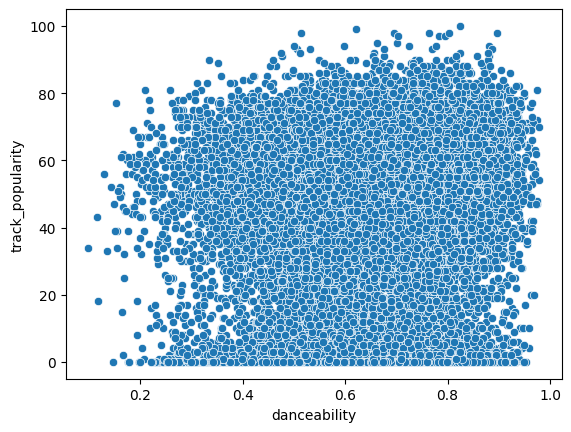

In [ ]:
sns.scatterplot(x='danceability', y='track_popularity', data=df)
plt.show()

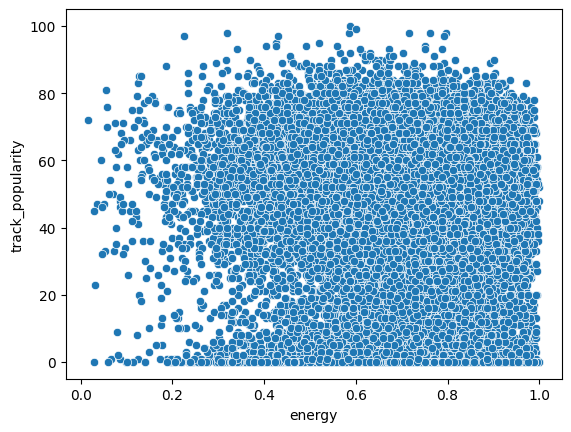

In [ ]:
sns.scatterplot(x='energy', y='track_popularity', data=df)
plt.show()

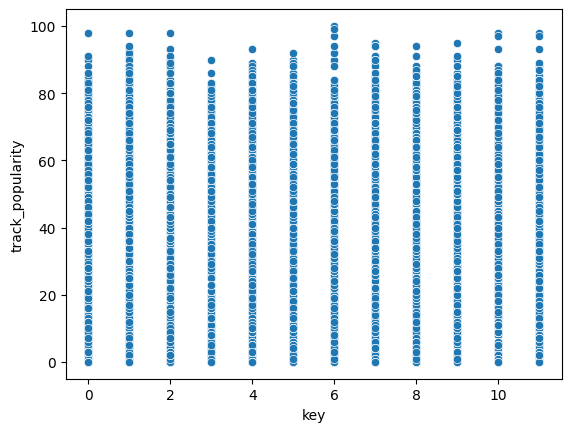

In [ ]:
sns.scatterplot(x='key', y='track_popularity', data=df)
plt.show()

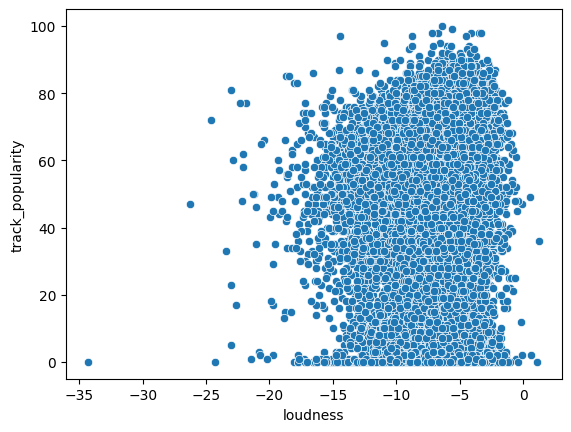

In [ ]:
sns.scatterplot(x='loudness', y='track_popularity', data=df)
plt.show()

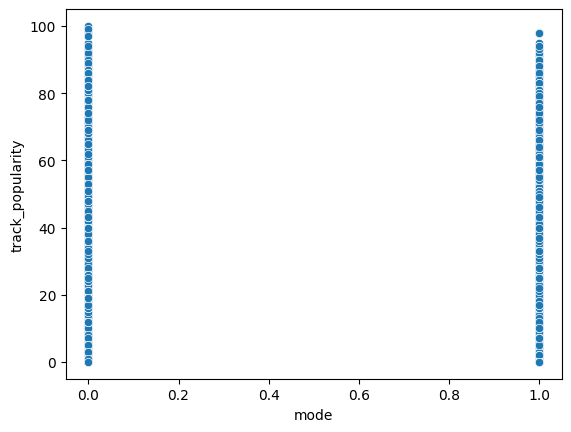

In [ ]:
sns.scatterplot(x='mode', y='track_popularity', data=df)
plt.show()

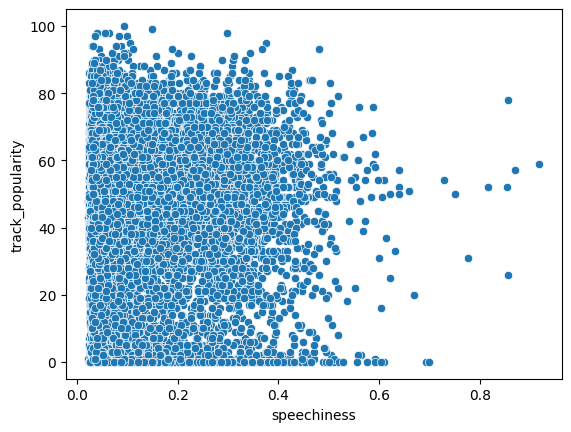

In [ ]:
sns.scatterplot(x='speechiness', y='track_popularity', data=df)
plt.show()

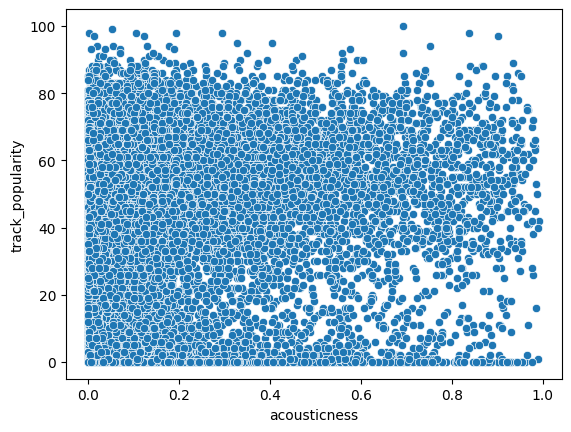

In [ ]:
sns.scatterplot(x='acousticness', y='track_popularity', data=df)
plt.show()

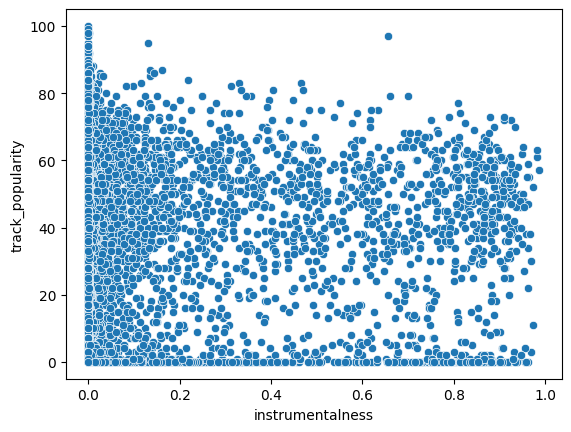

In [ ]:
sns.scatterplot(x='instrumentalness', y='track_popularity', data=df)
plt.show()

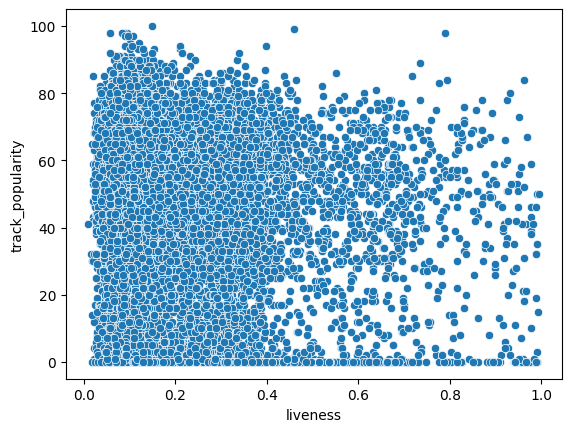

In [ ]:
sns.scatterplot(x='liveness', y='track_popularity', data=df)
plt.show()

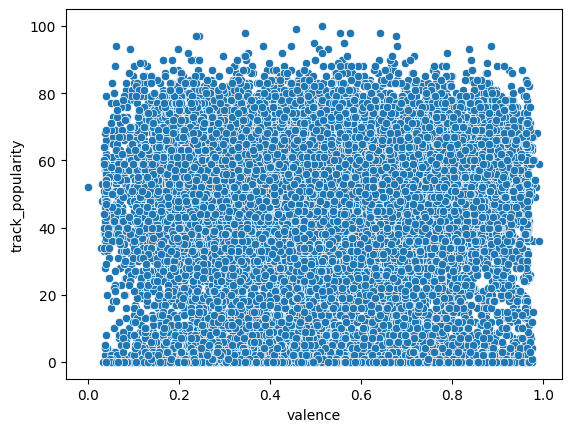

In [ ]:
sns.scatterplot(x='valence', y='track_popularity', data=df)
plt.show()

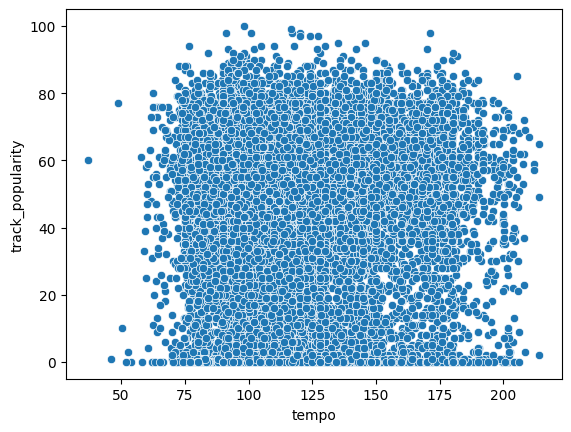

In [ ]:
sns.scatterplot(x='tempo', y='track_popularity', data=df)
plt.show()

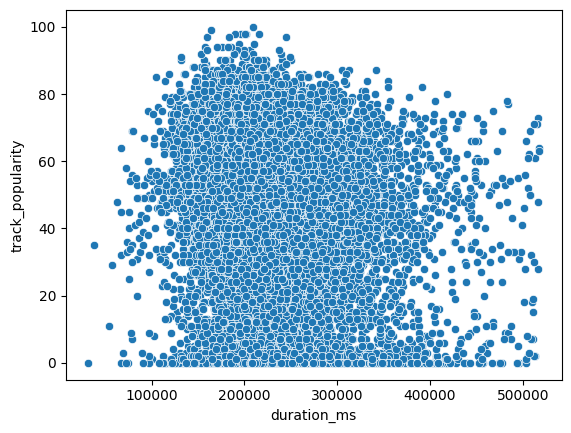

In [ ]:
sns.scatterplot(x='duration_ms', y='track_popularity', data=df)
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.061499 -0.093521 -0.006878   
danceability              0.061499      1.000000 -0.089708  0.002090   
energy                   -0.093521     -0.089708  1.000000  0.018833   
key                      -0.006878      0.002090  0.018833  1.000000   
loudness                  0.031290      0.022830  0.674795  0.007280   
mode                      0.010947     -0.078020 -0.009903 -0.169589   
speechiness              -0.000622      0.204041 -0.011986  0.026282   
acousticness              0.076821     -0.029240 -0.546033 -0.002067   
instrumentalness         -0.080933     -0.049187  0.042093  0.004243   
liveness                 -0.059334     -0.114719  0.156931  0.000682   
valence                  -0.004490      0.343419  0.207941  0.021927   
tempo                     0.011954     -0.201465  0.138291 -0.018967   
duration_ms              -0.143970     -0.133803 -0.021134  0.016984   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.031290  0.010947    -0.000622      0.076821   
danceability      0.022830 -0.078020     0.204041     -0.029240   
energy            0.674795 -0.009903    -0.011986     -0.546033   
key               0.007280 -0.169589     0.026282     -0.002067   
loudness          1.000000 -0.035276     0.029858     -0.370628   
mode             -0.035276  1.000000    -0.070013      0.022191   
speechiness       0.029858 -0.070013     1.000000     -0.000217   
acousticness     -0.370628  0.022191    -0.000217      1.000000   
instrumentalness -0.099164 -0.002906    -0.108365     -0.015803   
liveness          0.071159  0.004850     0.060072     -0.067491   
valence           0.050211 -0.009382     0.035202     -0.069817   
tempo             0.082558  0.026421     0.033620     -0.096149   
duration_ms      -0.159026  0.012433    -0.094343     -0.052996   

                  instrumentalness  liveness   valence     tempo  duration_ms  
track_popularity         -0.080933 -0.059334 -0.004490  0.011954    -0.143970  
danceability             -0.049187 -0.114719  0.343419 -0.201465    -0.133803  
energy                    0.042093  0.156931  0.207941  0.138291    -0.021134  
key                       0.004243  0.000682  0.021927 -0.018967     0.016984  
loudness                 -0.099164  0.071159  0.050211  0.082558    -0.159026  
mode                     -0.002906  0.004850 -0.009382  0.026421     0.012433  
speechiness              -0.108365  0.060072  0.035202  0.033620    -0.094343  
acousticness             -0.015803 -0.067491 -0.069817 -0.096149    -0.052996  
instrumentalness          1.000000 -0.000021 -0.103020  0.028126     0.078505  
liveness                 -0.000021  1.000000 -0.006931  0.015658     0.026988  
valence                  -0.103020 -0.006931  1.000000 -0.017101    -0.045546  
tempo                     0.028126  0.015658 -0.017101  1.000000    -0.014873  
duration_ms               0.078505  0.026988 -0.045546 -0.014873     1.000000

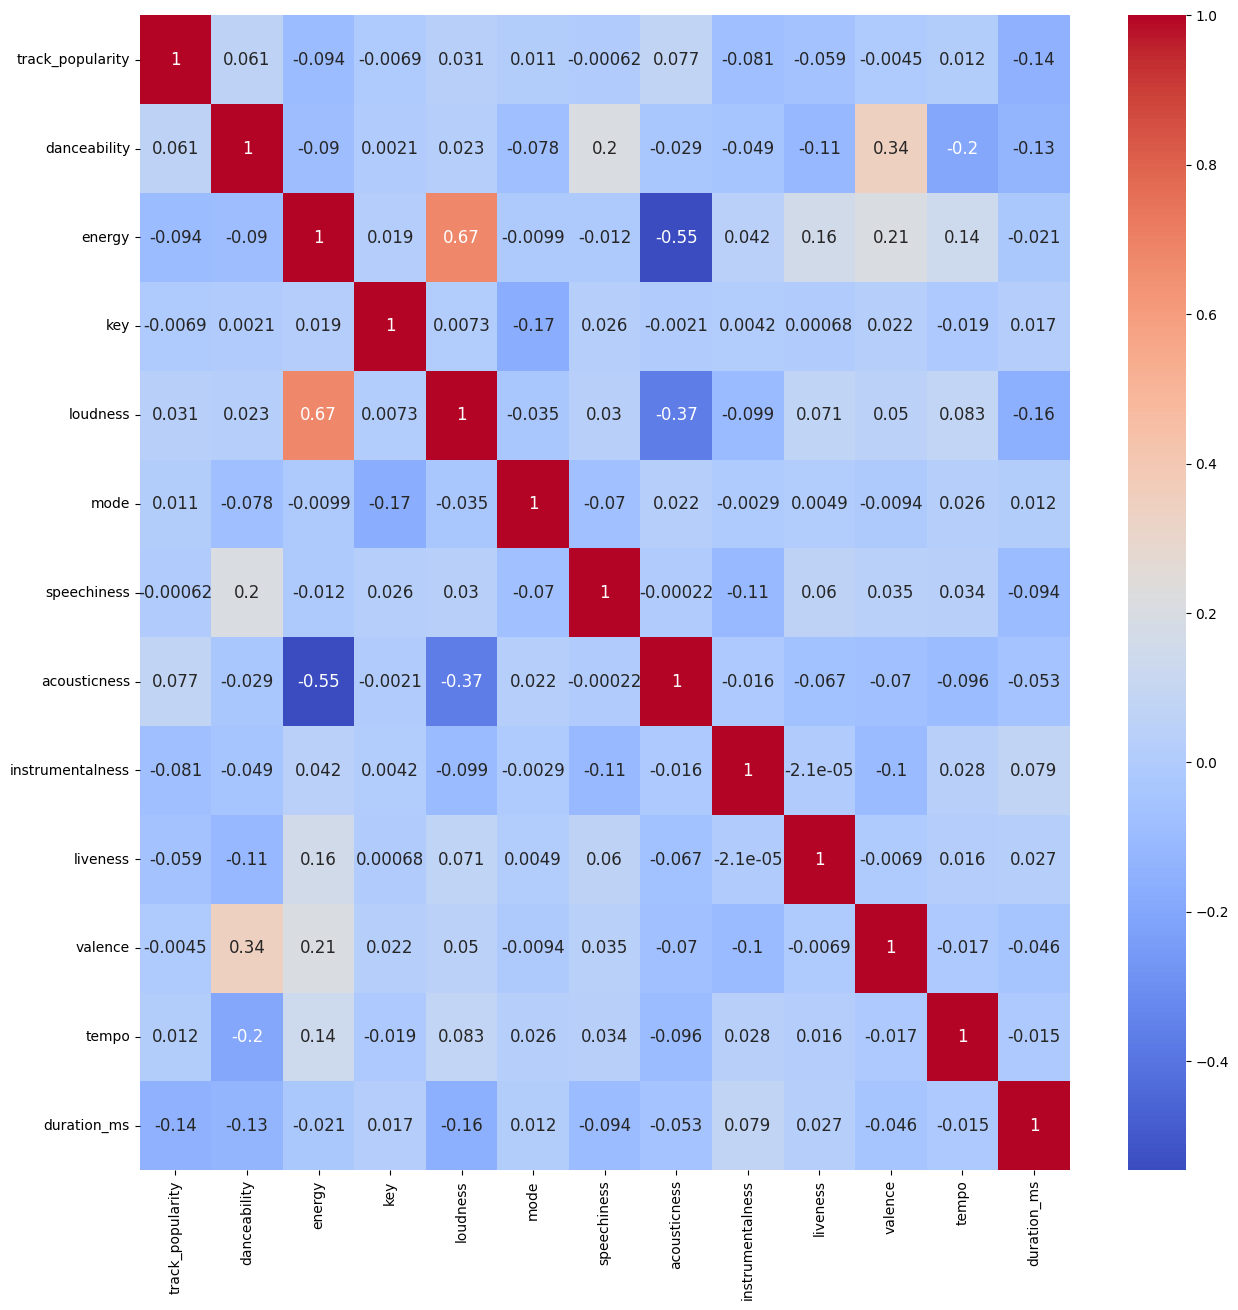

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"fontsize":12}, ax=ax)
plt.show()

In [ ]:
residuals = y_test - y_pred
residuals

6174      5.565989
8294     16.266536
4375      1.628423
10311    21.823949
5965    -39.705516
           ...    
9464     -4.820903
14477    52.451083
4980     -1.350045
8565    -40.400230
1681      9.025771
Name: track_popularity, Length: 3691, dtype: float64

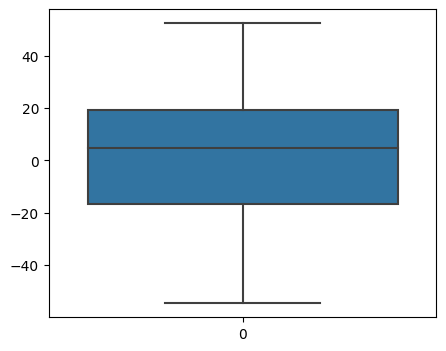

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(residuals, ax=ax)
plt.show()

In [ ]:
y_pred

array([33.43401108, 49.7334639 , 37.37157681, ..., 48.35004489,
       40.40023049, 42.97422876])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dflyrics = pd.read_csv('dat.csv')
dflyrics.head()

track_popularity                track_id  \
0              41.0  0017A6SJgTbfQVU2EtsPNo   
1              28.0  004s3t0ONYlzxII9PLgU6z   
2               0.0  00chLpzhgVjxs1zKC9UScL   
3              41.0  00cqd6ZsSkLZqGMlQCR0Zo   
4              65.0  00emjlCv9azBN0fzuuyLqy   

                                          track_name     track_artist  \
0                                           Pangarap  Barbie's Cradle   
1                                       I Feel Alive    Steady Rollin   
2                                             Poison   Bell Biv DeVoe   
3  Baby It's Cold Outside (feat. Christina Aguilera)      CeeLo Green   
4                                         Dumb Litty             KARD   

   lyrics_dim_0  lyrics_dim_1  lyrics_dim_2  lyrics_dim_3  lyrics_dim_4  \
0     -0.058687     -0.051955     -0.041783     -0.061065     -0.042640   
1     -0.065967     -0.027921     -0.034698     -0.068686      0.048735   
2     -0.056247     -0.042539     -0.012083     -0.057370     -0.037971   
3     -0.049499     -0.042787      0.000948     -0.063282     -0.021570   
4     -0.023482     -0.004275     -0.011224     -0.044246     -0.009216   

   lyrics_dim_5  ...  lyrics_dim_759  lyrics_dim_760  lyrics_dim_761  \
0     -0.002660  ...        0.020256       -0.018545        0.018808   
1      0.051609  ...       -0.001439        0.010046       -0.011507   
2     -0.025456  ...        0.010023       -0.041546       -0.005336   
3     -0.018737  ...        0.019300       -0.042911        0.035587   
4      0.022312  ...       -0.029638       -0.028636        0.038760   

   lyrics_dim_762  lyrics_dim_763  lyrics_dim_764  lyrics_dim_765  \
0       -0.054817       -0.039611       -0.043657        0.003283   
1       -0.007592       -0.031035       -0.030660       -0.038726   
2       -0.009253       -0.006841       -0.015273       -0.013107   
3        0.012431        0.000324       -0.029698       -0.021657   
4       -0.061289       -0.006527       -0.065773        0.023386   

   lyrics_dim_766  lyrics_dim_767  playlist_genre  
0       -0.060941       -0.047902            rock  
1       -0.010946       -0.063177            rock  
2       -0.005469       -0.065129             r&b  
3       -0.038497       -0.075374             r&b  
4        0.017876        0.004447             pop  

[5 rows x 773 columns]

In [ ]:
target = 'track_popularity'

In [ ]:
selected_features = []

In [ ]:
df_filtered = dflyrics.loc[:, ~dflyrics.columns.isin(['track_id', 'track_name', 'track_artist', 'playlist_genre'])]
df_filtered

track_popularity  lyrics_dim_0  lyrics_dim_1  lyrics_dim_2  \
0                  41.0     -0.058687     -0.051955     -0.041783   
1                  28.0     -0.065967     -0.027921     -0.034698   
2                   0.0     -0.056247     -0.042539     -0.012083   
3                  41.0     -0.049499     -0.042787      0.000948   
4                  65.0     -0.023482     -0.004275     -0.011224   
...                 ...           ...           ...           ...   
18449               0.0     -0.022080     -0.046012     -0.042908   
18450              49.0     -0.043650     -0.032551      0.014667   
18451              40.0     -0.039533     -0.056906     -0.028727   
18452              36.0     -0.057966     -0.042716     -0.042541   
18453              61.0     -0.022365     -0.035139     -0.053111   

       lyrics_dim_3  lyrics_dim_4  lyrics_dim_5  lyrics_dim_6  lyrics_dim_7  \
0         -0.061065     -0.042640     -0.002660     -0.060148      0.003739   
1         -0.068686      0.048735      0.051609     -0.046426     -0.006113   
2         -0.057370     -0.037971     -0.025456     -0.056762      0.039184   
3         -0.063282     -0.021570     -0.018737     -0.075551     -0.002493   
4         -0.044246     -0.009216      0.022312     -0.085818      0.036650   
...             ...           ...           ...           ...           ...   
18449     -0.074712     -0.027986     -0.016963     -0.069969      0.029518   
18450     -0.068469     -0.028351     -0.033002     -0.055935      0.004362   
18451     -0.075754     -0.012442      0.029250     -0.025079      0.007055   
18452     -0.068077      0.020891     -0.050059     -0.046311     -0.004288   
18453     -0.066127     -0.030650     -0.023881     -0.063481     -0.002944   

       lyrics_dim_8  ...  lyrics_dim_758  lyrics_dim_759  lyrics_dim_760  \
0         -0.053391  ...       -0.035234        0.020256       -0.018545   
1          0.004367  ...        0.012796       -0.001439        0.010046   
2         -0.042830  ...       -0.025969        0.010023       -0.041546   
3         -0.007746  ...        0.030141        0.019300       -0.042911   
4         -0.002408  ...        0.046152       -0.029638       -0.028636   
...             ...  ...             ...             ...             ...   
18449      0.017201  ...        0.011659       -0.010858       -0.053230   
18450     -0.023672  ...       -0.025805        0.002589        0.001362   
18451      0.005050  ...        0.013610        0.003484        0.045978   
18452     -0.058813  ...        0.025315       -0.011429       -0.003833   
18453      0.006779  ...       -0.034658        0.015431       -0.040145   

       lyrics_dim_761  lyrics_dim_762  lyrics_dim_763  lyrics_dim_764  \
0            0.018808       -0.054817       -0.039611       -0.043657   
1           -0.011507       -0.007592       -0.031035       -0.030660   
2           -0.005336       -0.009253       -0.006841       -0.015273   
3            0.035587        0.012431        0.000324       -0.029698   
4            0.038760       -0.061289       -0.006527       -0.065773   
...               ...             ...             ...             ...   
18449        0.046540        0.001976       -0.007717       -0.019403   
18450        0.021950        0.001042       -0.021788       -0.041522   
18451       -0.013944       -0.008594       -0.034756        0.051471   
18452       -0.034951       -0.010543       -0.018614       -0.008536   
18453       -0.035806       -0.017394       -0.032885        0.003057   

       lyrics_dim_765  lyrics_dim_766  lyrics_dim_767  
0            0.003283       -0.060941       -0.047902  
1           -0.038726       -0.010946       -0.063177  
2           -0.013107       -0.005469       -0.065129  
3           -0.021657       -0.038497       -0.075374  
4            0.023386        0.017876        0.004447  
...               ...             ...             ...  
18449       -0.054377       -0.055344       -0.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
components = pca.fit_transform(df_filtered)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=dflyrics['track_popularity'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3',  'color': 'Popularity'}
)
fig.show()

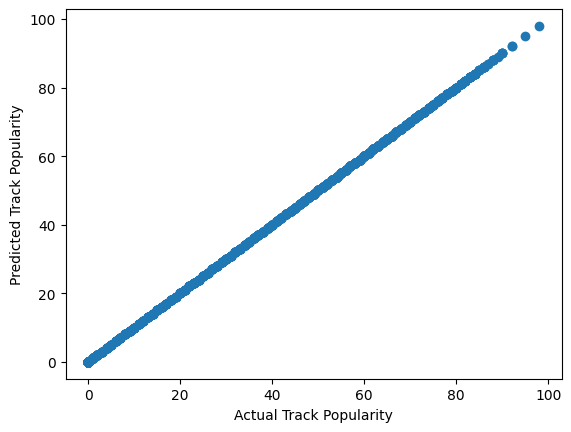

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# assume df is the DataFrame with 768-dimensional input features and 'track_popularity' as the output variable
X = df_filtered
y = dflyrics['track_popularity']

# apply PCA to reduce the number of dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# visualize the predictions against the actual values in a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.show()


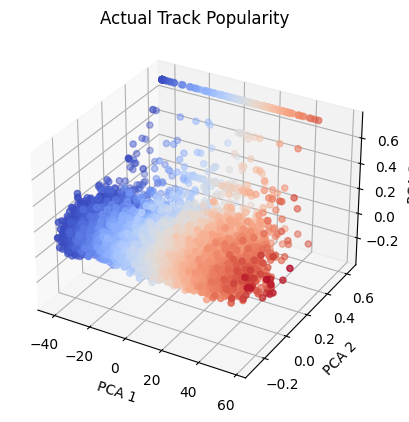

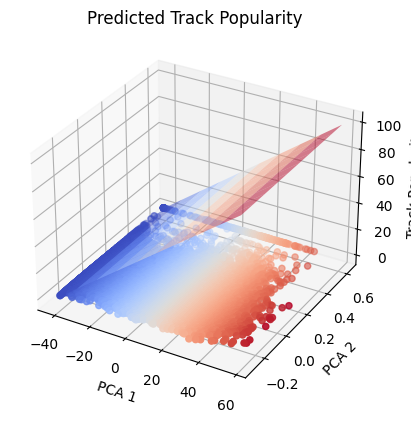

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# apply PCA to reduce the number of dimensions to 3
X = df_filtered
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
y = dflyrics['track_popularity']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the training set
y_pred = model.predict(X_train)

# create a 3D scatter plot of the training set input features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Actual Track Popularity')
plt.show()

# create a 3D scatter plot of the training set input features with the predicted values as a regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
x1, x2 = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 10), 
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10))
y_pred_plane = model.predict(np.c_[x1.ravel(), x2.ravel(), np.zeros_like(x1.ravel())])
y_pred_plane = y_pred_plane.reshape(x1.shape)
ax.plot_surface(x1, x2, y_pred_plane, alpha=0.5, cmap='coolwarm')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Track Popularity')
ax.set_title('Predicted Track Popularity')
plt.show()


In [ ]:
X_pca

array([[-1.43880473e+00, -1.00012677e-01,  2.42369583e-01],
       [-1.44388227e+01, -8.16032081e-02,  2.59161404e-02],
       [-4.24388096e+01,  3.73478115e-02,  6.24500740e-02],
       ...,
       [-2.43879986e+00,  2.31732472e-01, -1.55099216e-01],
       [-6.43882204e+00, -1.43119037e-01,  1.15428406e-02],
       [ 1.85611828e+01, -9.92222027e-02, -5.31904133e-03]])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([ 2.00000857, 82.00001672, 24.9999929 , ..., 76.99999307,
       82.99999203, 51.99999052])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 0.00


In [ ]:
print("R^2 Score: {:.2f}".format(r2))

R^2 Score: 1.00


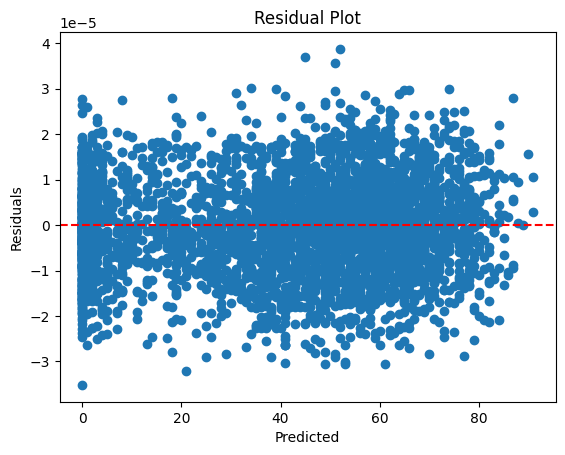

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

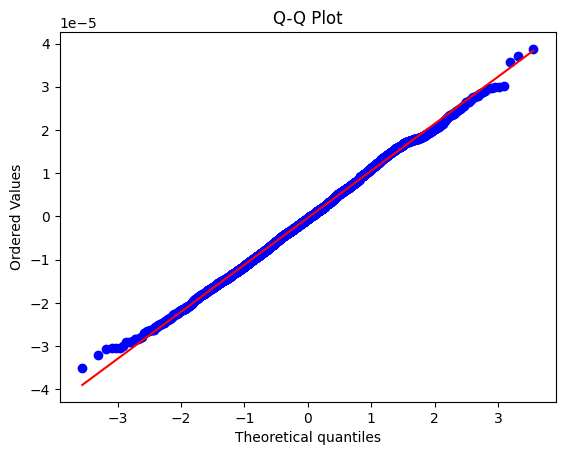

In [ ]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

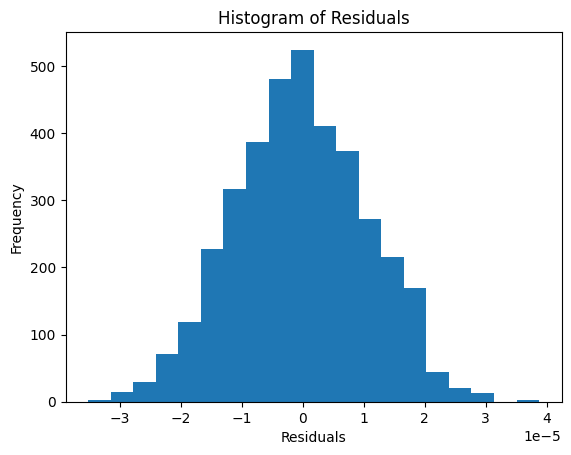

In [ ]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

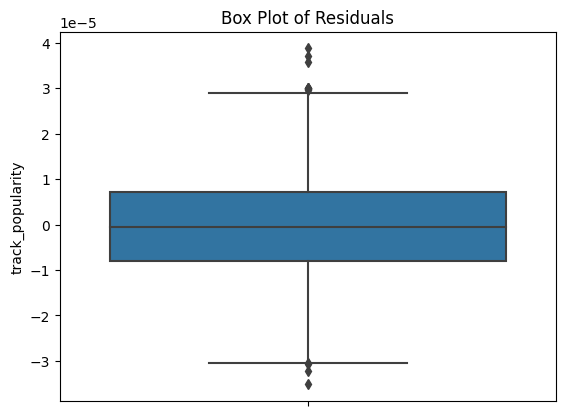

In [ ]:
sns.boxplot(y=residuals)
plt.title('Box Plot of Residuals')
plt.show()